In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

## quadratic relation

In [2]:
x = np.linspace(0, 10, 30) + np.random.normal(size=30)
x

array([-0.0573272 , -0.06303353,  0.62737178,  1.01410728, -0.03820683,
        0.24492314,  2.45969379,  0.79434863,  2.92426113,  1.65389367,
        4.35116477,  3.42684393,  4.13786982,  5.41036467,  6.35456605,
        6.31074923,  6.43849694,  6.92183719,  6.14407727,  6.61083818,
        6.38501005,  7.70167337,  8.71041265,  7.50760236,  6.39018225,
        9.69187937,  8.31078033, 10.55496311,  8.82925196, 10.67636812])

In [3]:
y = x**2 + np.random.normal(size = len(x), scale=5)

In [4]:
dfr = pd.concat([
    pd.Series(x),
    pd.Series(y),
    pd.Series(["raw"]*len(x)),
], axis=1)

dfr.columns=["x","y", "marker"]

dfr.head()

,x,y,marker
0,-0.057327,1.436971,raw
1,-0.063034,-2.050391,raw
2,0.627372,2.025722,raw
3,1.014107,-4.085680,raw
4,-0.038207,6.019727,raw


In [5]:
dfs = pd.concat([
    pd.Series(x*x),
    pd.Series(y),
    pd.Series(["squared"]*len(x)),
], axis=1)

dfs.columns=["x","y", "marker"]

dfs.head()

,x,y,marker
0,0.003286,1.436971,squared
1,0.003973,-2.050391,squared
2,0.393595,2.025722,squared
3,1.028414,-4.085680,squared
4,0.001460,6.019727,squared


In [6]:
df = pd.concat([dfr, dfs], axis=0)

df.head()

,x,y,marker
0,-0.057327,1.436971,raw
1,-0.063034,-2.050391,raw
2,0.627372,2.025722,raw
3,1.014107,-4.085680,raw
4,-0.038207,6.019727,raw


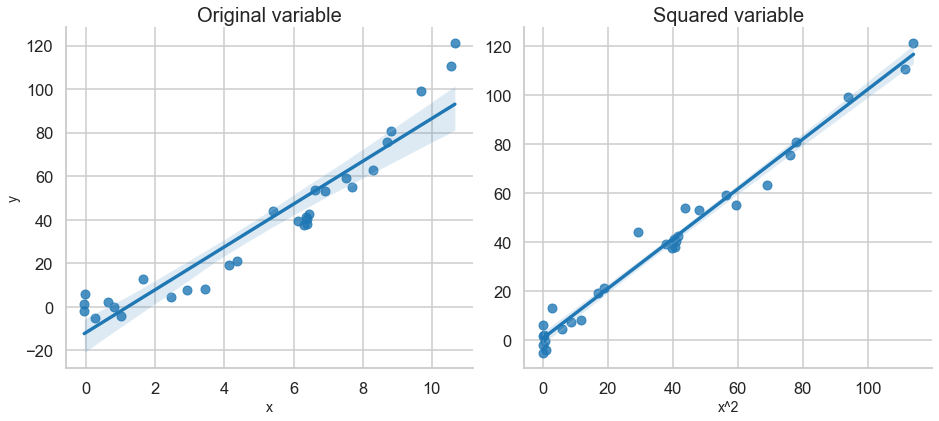

In [7]:
sns.set_style("whitegrid")
with sns.plotting_context("talk"):

    g = sns.lmplot(
        data=df, x="x", y="y",
        col="marker", height=6, aspect=1.1, 
        facet_kws=dict(sharex=False, sharey=False,),    
    )

    g.axes[0,0].set_ylabel('y', fontsize=14)
    g.axes[0,0].set_xlabel('x', fontsize=14)
    g.axes[0,1].set_xlabel('x^2', fontsize=14)
    g.axes[0,0].set_title('Original variable', fontsize=20)
    g.axes[0,1].set_title('Squared variable', fontsize=20)

    plt.show()

## xor

In [15]:
x = np.random.uniform(low=-4, high=4, size=(400, 2))
y = pd.Series(np.bitwise_xor(np.sign(x[:, 0]).astype(int), np.sign(x[:, 1]).astype(int)))
y = y.map({0:1, -2:0})
x = pd.DataFrame(x, columns=["x1", "x2"])
x["x3"] = x["x1"]*x["x2"]

x.head()

,x1,x2,x3
0,3.179007,-3.107663,-9.879284
1,-2.108476,-0.574685,1.211709
2,0.450693,-0.184024,-0.082938
3,2.785754,3.267533,9.102543
4,-3.767725,2.804592,-10.566929


In [16]:
y

0      0
1      1
2      0
3      1
4      0
      ..
395    1
396    0
397    1
398    1
399    0
Length: 400, dtype: int64

In [17]:
cmap = (mpl.colors.ListedColormap(['blue', 'cyan', 'yellow', 'red'])
        .with_extremes(over='red', under='blue'))

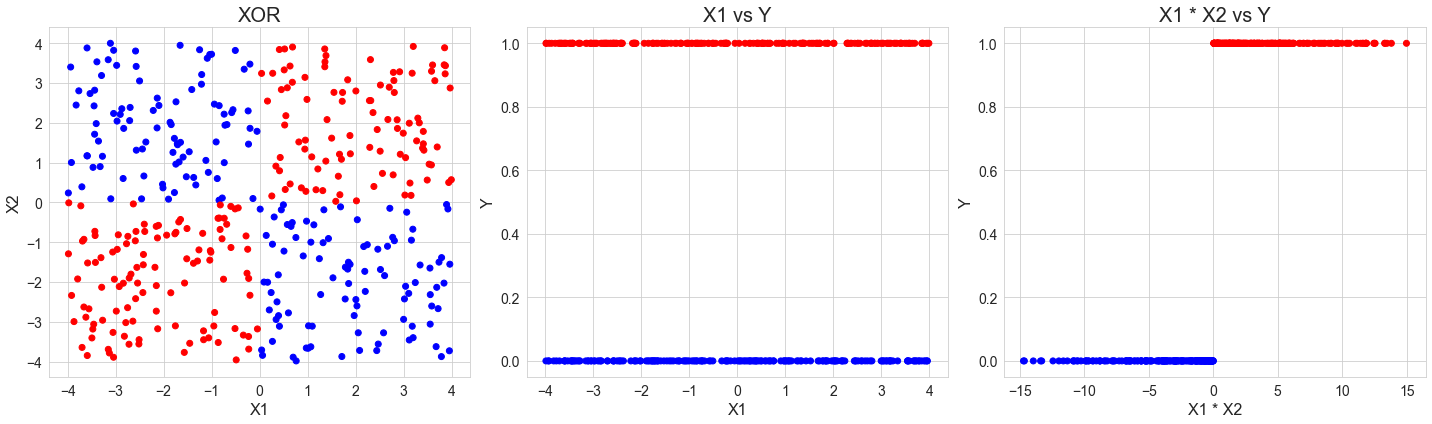

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 6))
fig.tight_layout()

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

axes[0].scatter(x["x1"], x["x2"], c=y,  cmap=cmap,)
axes[1].scatter(x["x1"], y, c=y,  cmap=cmap,)
axes[2].scatter(x["x3"], y, c=y,  cmap=cmap,)

axes[0].set_xlabel('X1', fontsize=16)
axes[0].set_ylabel('X2', fontsize=16)
axes[0].set_title('XOR', fontsize=20)

axes[1].set_xlabel('X1', fontsize=16)
axes[1].set_ylabel('Y', fontsize=16)
axes[1].set_title('X1 vs Y', fontsize=20)

axes[2].set_xlabel('X1 * X2', fontsize=16)
axes[2].set_ylabel('Y', fontsize=16)
axes[2].set_title('X1 * X2 vs Y', fontsize=20)

fig.tight_layout()
plt.show()